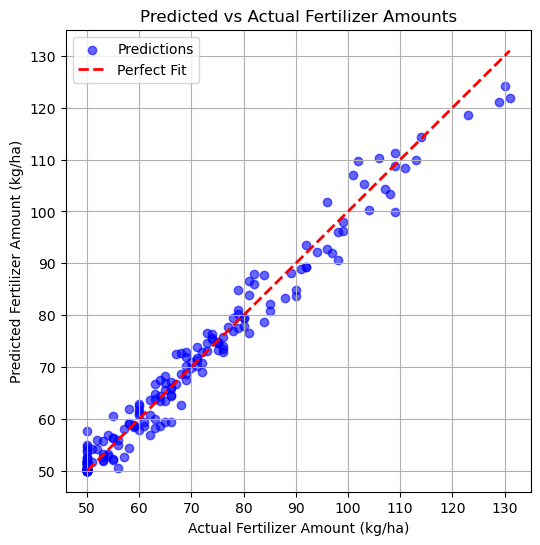

In [3]:
#LOADING AND TRAINING
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import joblib

# Load dataset
data = pd.read_csv(r"fertilizer data.csv")


# Encode categorical variables: Crop and Fertilizer_Type
crop_encoder = LabelEncoder()
data['Crop_enc'] = crop_encoder.fit_transform(data['Crop'])

fertilizer_encoder = LabelEncoder()
data['Fertilizer_Type_enc'] = fertilizer_encoder.fit_transform(data['Fertilizer_Type'])

# Features common for both models
feature_cols = ['N', 'P', 'K', 'pH', 'Temperature', 'Humidity', 'Rainfall', 'Crop_enc']

X = data[feature_cols]

# Target variables
y_type = data['Fertilizer_Type_enc']       # classification
y_amount = data['Fertilizer_Amount (kg/ha)']  # regression

# Split for fertilizer type model
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y_type, test_size=0.2, random_state=42)

# Train classifier for fertilizer type
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_t, y_train_t)

# Split for fertilizer amount model
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X, y_amount, test_size=0.2, random_state=42)

# Train regressor for fertilizer amount
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_a, y_train_a)

# Save models and encoders
joblib.dump(clf, 'models/fertilizer_type_model.pkl')
joblib.dump(reg, 'models/fertilizer_amount_model.pkl')
joblib.dump(crop_encoder, 'models/crop_encoder.pkl')
joblib.dump(fertilizer_encoder, 'models/fertilizer_encoder.pkl')



import matplotlib.pyplot as plt

# Get predictions on the test set
y_pred_a = reg.predict(X_test_a)

# Plot predicted vs actual
plt.figure(figsize=(6,6))
plt.scatter(y_test_a, y_pred_a, color="blue", alpha=0.6, label="Predictions")
plt.plot([y_test_a.min(), y_test_a.max()], [y_test_a.min(), y_test_a.max()], "r--", lw=2, label="Perfect Fit")
plt.xlabel("Actual Fertilizer Amount (kg/ha)")
plt.ylabel("Predicted Fertilizer Amount (kg/ha)")
plt.title("Predicted vs Actual Fertilizer Amounts")
plt.legend()
plt.grid(True)
plt.show()



In [4]:
#STREAMLIT APP
import streamlit as st
import numpy as np
import joblib

# Load models and encoders
clf = joblib.load('models/fertilizer_type_model.pkl')
reg = joblib.load('models/fertilizer_amount_model.pkl')
crop_encoder = joblib.load('models/crop_encoder.pkl')
fertilizer_encoder = joblib.load('models/fertilizer_encoder.pkl')

st.title("🌾 Optimal Fertilizer Prediction")

# User inputs
N = st.number_input("Nitrogen content (N)", min_value=0, max_value=200, value=50)
P = st.number_input("Phosphorus content (P)", min_value=0, max_value=200, value=20)
K = st.number_input("Potassium content (K)", min_value=0, max_value=200, value=30)
pH = st.number_input("Soil pH value", min_value=0.0, max_value=14.0, value=6.5)
temperature = st.number_input("Temperature (°C)", min_value=-10.0, max_value=50.0, value=25.0)
humidity = st.number_input("Humidity (%)", min_value=0, max_value=100, value=70)
rainfall = st.number_input("Rainfall (mm)", min_value=0, max_value=500, value=150)

crop_list = list(crop_encoder.classes_)
crop = st.selectbox("Select Crop", crop_list)

# Encode crop input
crop_enc = crop_encoder.transform([crop])[0]

# Prepare input features for prediction
features = np.array([[N, P, K, pH, temperature, humidity, rainfall, crop_enc]])

if st.button("Predict Optimal Fertilizer"):
    # Predict fertilizer type (encoded)
    pred_type_enc = clf.predict(features)[0]
    pred_type = fertilizer_encoder.inverse_transform([pred_type_enc])[0]

    # Predict fertilizer amount
    pred_amount = reg.predict(features)[0]

    st.success(f"Recommended Fertilizer Type: **{pred_type}**")
    st.success(f"Recommended Fertilizer Amount: **{pred_amount:.2f} kg/ha**")


2025-08-17 20:46:01.563 
  command:

    streamlit run c:\Users\Aaron\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-17 20:46:01.568 Session state does not function when running a script without `streamlit run`


In [5]:
import streamlit as st
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load models and encoders
clf = joblib.load('models/fertilizer_type_model.pkl')
reg = joblib.load('models/fertilizer_amount_model.pkl')
crop_encoder = joblib.load('models/crop_encoder.pkl')
fertilizer_encoder = joblib.load('models/fertilizer_encoder.pkl')

# Page title and description
st.set_page_config(page_title="🌾 Optimal Fertilizer Prediction", layout="wide")
st.title("🌾 Optimal Fertilizer Prediction App")
st.markdown("**Predict the best fertilizer type and application rate based on soil and weather conditions.**")

# Sidebar for background info
st.sidebar.header("📌 About This Project")
st.sidebar.write("""
This tool uses **Random Forest Machine Learning Models** to recommend 
the optimal fertilizer type and amount for a given crop based on soil and climate data.
""")
st.sidebar.write("**Dataset size:** 30+ rows (demo snippet)\n**Models:** Random Forest Classifier & Regressor")
st.sidebar.write("**Made with:** Streamlit, scikit-learn, pandas")

# User inputs
st.subheader("Enter Soil & Climate Data")
col1, col2, col3 = st.columns(3)

with col1:
    N = st.number_input("Nitrogen (N)", min_value=0, max_value=200, value=50)
    pH = st.number_input("Soil pH", min_value=0.0, max_value=14.0, value=6.5)
    humidity = st.number_input("Humidity (%)", min_value=0, max_value=100, value=70)
with col2:
    P = st.number_input("Phosphorus (P)", min_value=0, max_value=200, value=20)
    temperature = st.number_input("Temperature (°C)", min_value=-10.0, max_value=50.0, value=25.0)
    rainfall = st.number_input("Rainfall (mm)", min_value=0, max_value=500, value=150)
with col3:
    K = st.number_input("Potassium (K)", min_value=0, max_value=200, value=30)
    crop_list = list(crop_encoder.classes_)
    crop = st.selectbox("Select Crop", crop_list)

# Encode crop input
crop_enc = crop_encoder.transform([crop])[0]

# Prepare input for prediction
features = np.array([[N, P, K, pH, temperature, humidity, rainfall, crop_enc]])

if st.button("🔍 Predict Optimal Fertilizer"):
    # Predict fertilizer type (encoded)
    pred_type_probs = clf.predict_proba(features)[0]
    pred_type_enc = np.argmax(pred_type_probs)
    pred_type = fertilizer_encoder.inverse_transform([pred_type_enc])[0]
    confidence = pred_type_probs[pred_type_enc] * 100

    # Predict fertilizer amount
    pred_amount = reg.predict(features)[0]

    # Display predictions
    st.subheader("Prediction Results")
    st.success(f"**Recommended Fertilizer:** {pred_type} (Confidence: {confidence:.1f}%)")
    st.success(f"**Recommended Amount:** {pred_amount:.2f} kg/ha")

    # Farming tips
    st.subheader("🌱 Farming Tip")
    tips = {
        "Urea": "Apply in moist soil and avoid direct sunlight exposure to reduce nitrogen loss.",
        "NPK 20-10-10": "Great for boosting vegetative growth; ensure balanced watering.",
        "NPK 15-15-15": "Good general-purpose fertilizer; apply before rainfall for best results.",
        "Ammonium Sulphate": "Helps in acidic soils; avoid overuse to prevent acidification.",
        "Asaase Wura": "Local organic blend; improves soil health over time.",
        "Organic Cocoa Blend": "Perfect for cocoa; improves bean size and yield.",
        "NPK 12-15-17": "Best for root crops; promotes tuber growth.",
        "Single Super Phosphate": "Boosts flowering and seed formation.",
        "Generic NPK": "Balanced nutrient source; apply evenly.",
        "NPK 12-10-18": "Supports strong stems and root systems."
    }
    st.info(tips.get(pred_type, "Use recommended dosage and follow local agricultural extension advice."))

    # Feature importance chart
    st.subheader("📊 Feature Importance (Model Insights)")
    importances = clf.feature_importances_
    feature_names = ["N", "P", "K", "pH", "Temperature", "Humidity", "Rainfall", "Crop"]
    importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
    importance_df = importance_df.sort_values("Importance", ascending=False)

    fig, ax = plt.subplots()
    ax.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
    ax.set_xlabel("Importance Score")
    ax.set_ylabel("Feature")
    ax.set_title("Feature Influence on Fertilizer Type Prediction")
    st.pyplot(fig)
